# Part (a): Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# from sklearnex import patch_sklearn
# patch_sklearn()
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

### Increase number of visible columns

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Lead Dataset

In [5]:
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')

### Change dataset according to given conditions

In [6]:
train.drop(train[train['loan_status'] == "Current"].index, inplace = True)
train.loan_status.replace(["Fully Paid","Charged Off"],[1,-1], inplace=True)

In [7]:
test.drop(test[test['loan_status'] == "Current"].index, inplace = True)
test.loan_status.replace(["Fully Paid","Charged Off"],[1,-1], inplace=True)

### Analyse dataset

In [8]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24301 entries, 0 to 24998
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              24301 non-null  int64  
 1    member_id                       24301 non-null  int64  
 2    loan_amnt                       24301 non-null  int64  
 3    funded_amnt                     24301 non-null  int64  
 4    funded_amnt_inv                 24301 non-null  float64
 5    term                            24301 non-null  object 
 6    int_rate                        24301 non-null  object 
 7    installment                     24301 non-null  float64
 8    grade                           24301 non-null  object 
 9    sub_grade                       24301 non-null  object 
 10   emp_title                       24295 non-null  object 
 11   emp_length                      24261 non-null  object 
 12   home_ownership  

### Find number of null values in the dataset

In [9]:
100*train.isnull().sum()/len(train)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           0.024690
emp_length                          0.164602
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.685898
purpose                             0.000000
title                               0.032920
zip_code  

In [10]:
train.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.430100e+04,2.430100e+04,24301.000000,24301.000000,24301.000000,24301.000000,2.430100e+04,24301.000000,24301.000000,24301.000000,24301.000000,8534.000000,1655.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.0,24301.0,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24272.0,0.0,24301.0,0.0,0.0,0.0,24301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24272.0,24301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23884.000000,24284.0,0.0,0.0,0.0,0.0
mean,6.759235e+05,8.419130e+05,11108.384429,10836.688819,10275.873993,323.714343,6.980225e+04,0.714086,13.293911,0.145426,0.870335,35.873799,69.343807,9.347475,0.053413,13427.547385,22.141393,0.0,0.0,11968.517641,11367.899976,9723.016746,2143.968805,1.358008,100.174160,12.354023,2771.944580,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041953,0.0,NaN,NaN,NaN,NaN
std,2.080452e+05,2.630066e+05,7295.677660,7032.562475,6965.327422,206.729425,6.999915e+04,0.700073,6.646290,0.494832,1.071179,21.951875,43.877160,4.398961,0.235061,15801.735780,11.364283,0.0,0.0,8770.861953,8652.249737,6971.625050,2388.945182,7.397470,719.351788,139.801427,4505.872171,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201319,0.0,NaN,NaN,NaN,NaN
min,5.574200e+04,7.367300e+04,500.000000,500.000000,0.000000,16.080000,4.080000e+03,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.126710e+05,6.619030e+05,5500.000000,5500.000000,5000.000000,167.780000,4.200000e+04,1.000000,8.180000,0.000000,0.000000,18.000000,19.500000,6.000000,0.000000,3794.000000,14.000000,0.0,0.0,5598.284713,5149.520000,4700.000000,664.420000,0.000000,0.000000,0.000000,223.360000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Drop columns that don't containt any data

In [11]:
train = train.dropna(axis=1,how='all')
test = test.dropna(axis=1,how='all')

### Drop other columns with siginifcant number of columns having NULL

In [12]:
train = train.drop(['mths_since_last_delinq', 'mths_since_last_record','desc'], axis=1)
test = test.drop(['mths_since_last_delinq', 'mths_since_last_record','desc'], axis=1)

### Check distribution of loan amounts

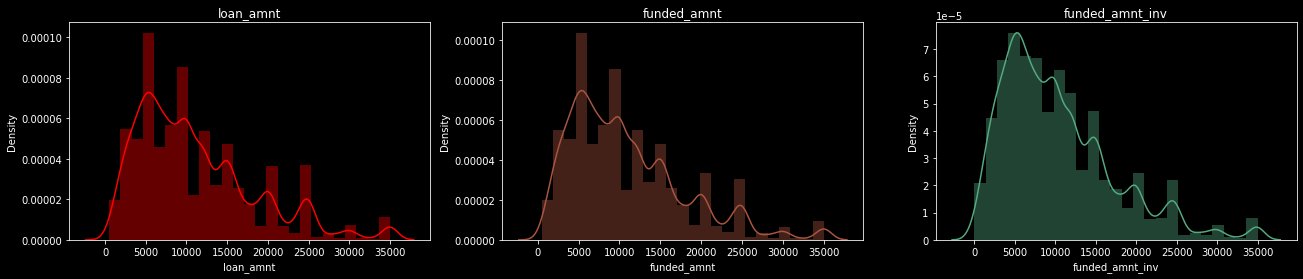

In [13]:
colnames = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']

fig, axes = plt.subplots(1, 3, figsize=(22, 4))
for ii, cname in enumerate(colnames) :
    sns.distplot(train[cname], bins=25, ax=axes[ii], color=[1-ii/3,ii/3,ii/4])
    axes[ii].set_title(cname)

### Replace all nan values with median values for that column

In [14]:
train = train.fillna(train.median())
test = test.fillna(test.median())

### Check the data present in dataset

In [15]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,573354,737474,10000,10000,9950.0,36 months,7.51%,311.11,A,A4,15,10+ years,RENT,30000.0,Source Verified,10-Sep,-1,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,homeimproement,076xx,NJ,5.00,0,1-Feb,3,19,0,1450,1.20%,48,f,0.0,0.0,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,11-Mar,311.11,11-Jul,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,476321,603324,15000,15000,14800.0,36 months,8.94%,476.58,A,A5,1400,1 year,RENT,147000.0,Not Verified,10-Jan,1,n,https://lendingclub.com/browse/loanDetail.acti...,other,Green City,300xx,GA,3.47,0,Feb-97,0,6,0,4910,14%,17,f,0.0,0.0,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,10-Mar,15114.03,10-Feb,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,451484,556265,2000,2000,2000.0,36 months,13.57%,67.94,C,C3,36000,4 years,OWN,36000.0,Not Verified,9-Oct,1,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,payoff w/in 2 years,310xx,GA,7.83,0,Mar-00,0,8,0,1790,34.40%,10,f,0.0,0.0,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,11-Dec,101.78,11-Dec,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,800018,1005270,14000,14000,14000.0,60 months,17.49%,351.64,D,D5,old palm inc,5 years,MORTGAGE,50000.0,Not Verified,11-Jul,1,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,save %,334xx,FL,21.24,1,4-Jun,1,9,1,553,9.40%,27,f,0.0,0.0,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,15-Sep,3943.27,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,471391,595223,12000,12000,11900.0,36 months,8.94%,381.26,A,A5,Brocade Communications,7 years,MORTGAGE,294000.0,Not Verified,9-Dec,1,n,https://lendingclub.com/browse/loanDetail.acti...,other,Invest in Lending Club Notes,939xx,CA,0.50,0,Aug-93,0,11,0,5306,2.80%,21,f,0.0,0.0,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,10-May,11204.30,10-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Drop other useless columns

In [16]:
train = train.drop(['id', 'member_id', 'emp_title','issue_d',  'pymnt_plan', 'url', 'purpose', 'title','zip_code', 'addr_state', 'earliest_cr_line','last_pymnt_d', 'last_pymnt_amnt', 'grade', 'sub_grade', 'revol_util', 'initial_list_status', 'last_credit_pull_d', 'application_type'], axis=1)
test = test.drop(['id', 'member_id', 'emp_title','issue_d',  'pymnt_plan', 'url', 'purpose', 'title','zip_code', 'addr_state', 'earliest_cr_line','last_pymnt_d', 'last_pymnt_amnt', 'grade', 'sub_grade', 'revol_util', 'initial_list_status', 'last_credit_pull_d', 'application_type'], axis=1)

### Analyse and convert categorial columns

In [17]:
train['term'].value_counts()

 36 months    18203
 60 months     6098
Name: term, dtype: int64

In [18]:
train['term'] = train['term'].apply(lambda x: int(x[:2]))
test['term'] = test['term'].apply(lambda x: int(x[:2]))

In [19]:
train['int_rate'].value_counts()

10.99%    575
7.51%     496
11.49%    479
7.88%     476
13.49%    470
7.49%     425
9.99%     357
5.42%     355
7.90%     348
11.71%    341
11.99%    330
10.37%    299
12.69%    282
8.49%     279
6.03%     265
10.65%    252
9.63%     252
7.29%     250
12.42%    249
11.86%    247
8.90%     247
12.99%    246
6.62%     245
5.79%     243
10.59%    225
14.27%    215
11.11%    214
6.99%     211
12.53%    210
6.54%     208
10.74%    207
5.99%     204
9.91%     203
7.14%     199
13.61%    192
6.91%     190
16.77%    189
13.98%    187
8.94%     185
7.66%     184
13.23%    174
15.99%    172
12.68%    167
10.00%    162
10.36%    157
6.17%     153
11.12%    150
11.36%    150
10.75%    148
13.99%    147
14.96%    144
18.25%    137
10.25%    137
10.38%    135
16.49%    134
15.95%    134
10.62%    134
11.14%    133
11.83%    132
12.18%    131
13.06%    129
16.32%    127
8.00%     127
15.65%    126
6.92%     124
14.79%    124
9.62%     121
15.58%    120
14.65%    120
15.21%    120
12.61%    120
15.23%

In [20]:
train['int_rate'] = train['int_rate'].apply(lambda x: float(x[:-1]))
test['int_rate'] = test['int_rate'].apply(lambda x: float(x[:-1]))

In [21]:
train['emp_length'].value_counts()

10+ years    5315
< 1 year     2816
2 years      2806
3 years      2675
4 years      2223
5 years      2087
1 year       2081
6 years      1385
7 years      1108
8 years       942
9 years       823
Name: emp_length, dtype: int64

In [22]:
train.emp_length.replace(["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10+ years"], [0,1,2,3,4,5,6,7,8,9,10], inplace=True)
test.emp_length.replace(["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10+ years"], [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [23]:
train['home_ownership'].value_counts()

RENT        11777
MORTGAGE    10726
OWN          1736
OTHER          62
Name: home_ownership, dtype: int64

In [24]:
train.home_ownership.replace(["RENT", "MORTGAGE", "OWN", "OTHER", "NONE"], [0,1,2,3,3], inplace=True)
test.home_ownership.replace(["RENT", "MORTGAGE", "OWN", "OTHER", "NONE"], [0,1,2,3,3], inplace=True)

In [25]:
train['verification_status'].value_counts()

Not Verified       10614
Verified            7525
Source Verified     6162
Name: verification_status, dtype: int64

In [26]:
train.verification_status.replace(["Not Verified", "Verified", "Source Verified"], [0,1,2], inplace=True)
test.verification_status.replace(["Not Verified", "Verified", "Source Verified"], [0,1,2], inplace=True)

### Check if all columns are converted

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24301 entries, 0 to 24998
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   24301 non-null  int64  
 1   funded_amnt                 24301 non-null  int64  
 2   funded_amnt_inv             24301 non-null  float64
 3   term                        24301 non-null  int64  
 4   int_rate                    24301 non-null  float64
 5   installment                 24301 non-null  float64
 6   emp_length                  24261 non-null  float64
 7   home_ownership              24301 non-null  int64  
 8   annual_inc                  24301 non-null  float64
 9   verification_status         24301 non-null  int64  
 10  loan_status                 24301 non-null  int64  
 11  dti                         24301 non-null  float64
 12  delinq_2yrs                 24301 non-null  int64  
 13  inq_last_6mths              243

### Correlation heatmap for dataset

<AxesSubplot:>

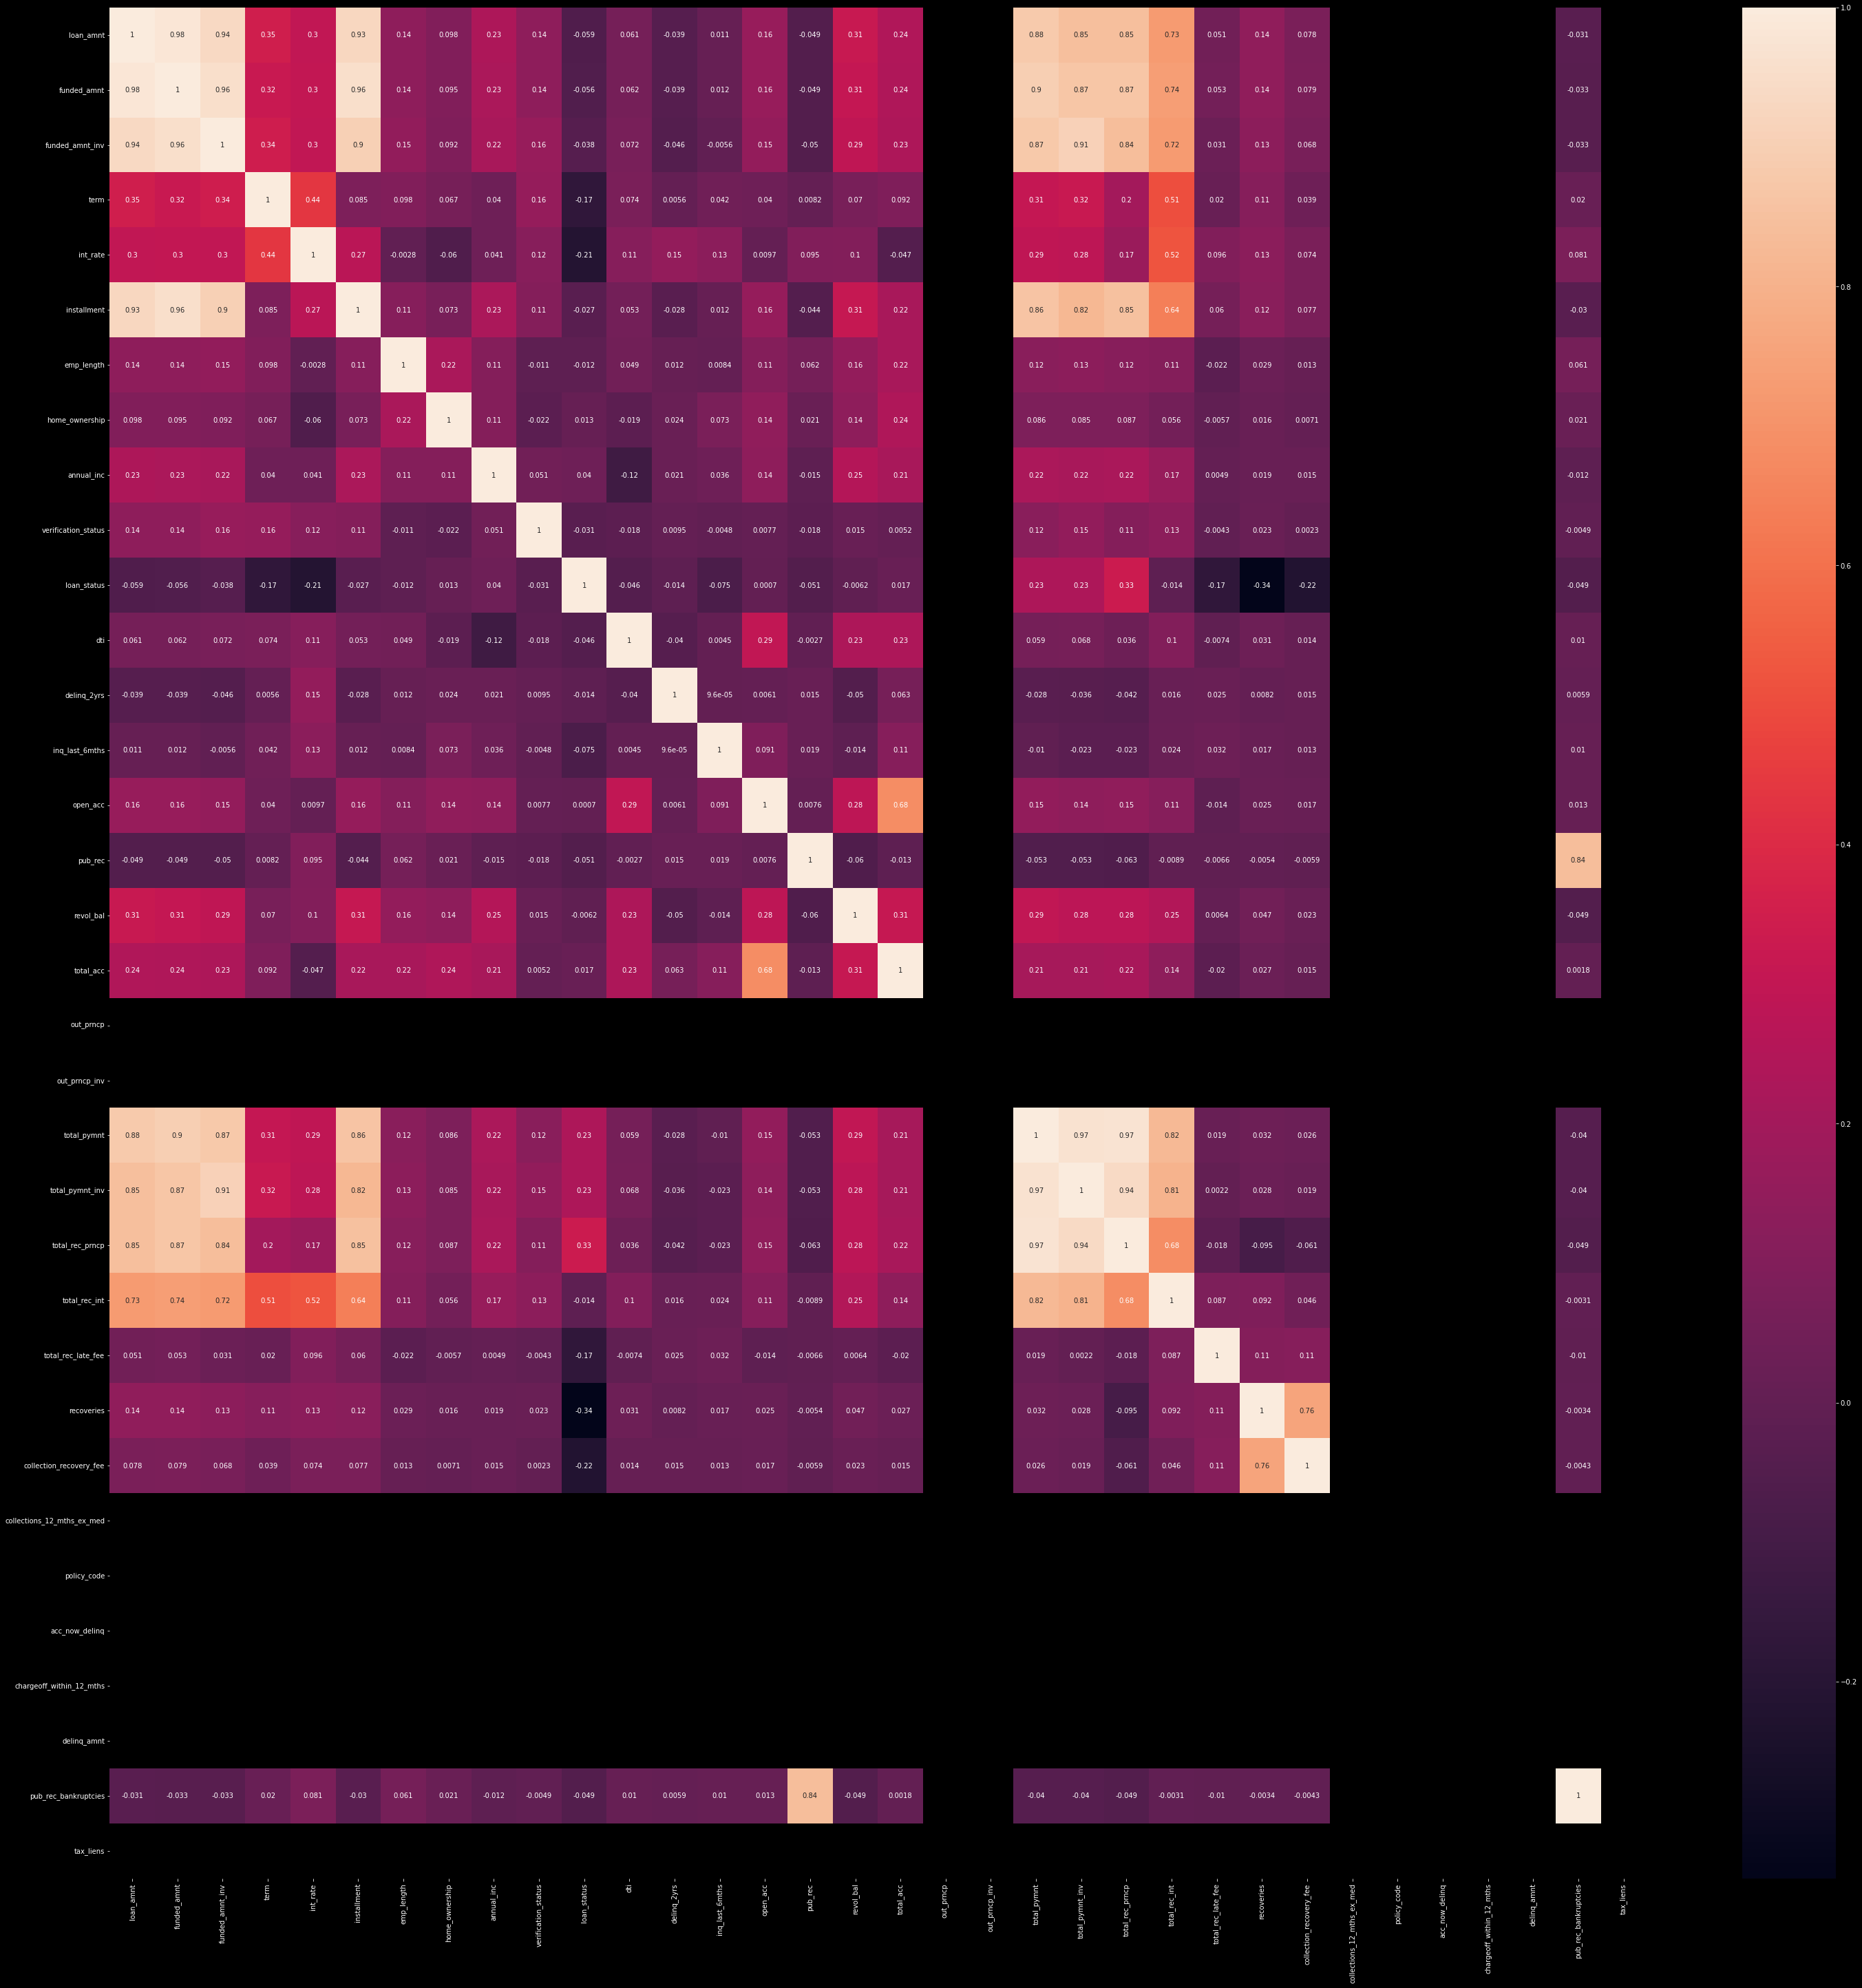

In [28]:
plt.figure(figsize = (50,50))
sns.heatmap(train.corr(), annot = True)

In [29]:
train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24261.000000,24301.000000,2.430100e+04,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.0,24301.0,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.0,24301.0,24301.0,24301.0,24301.0,24301.000000,24301.0
mean,11108.384429,10836.688819,10275.873993,3.752809,11.976828,323.714343,4.913400,0.591910,6.980225e+04,0.816798,0.714086,13.293911,0.145426,0.870335,9.347475,0.053413,13427.547385,22.141393,0.0,0.0,11968.517641,11367.899976,9723.016746,2143.968805,1.358008,100.174160,12.354023,0.0,1.0,0.0,0.0,0.0,0.041233,0.0
std,7295.677660,7032.562475,6965.327422,1.300682,3.698571,206.729425,3.528409,0.632259,6.999915e+04,0.810436,0.700073,6.646290,0.494832,1.071179,4.398961,0.235061,15801.735780,11.364283,0.0,0.0,8770.861953,8652.249737,6971.625050,2388.945182,7.397470,719.351788,139.801427,0.0,0.0,0.0,0.0,0.0,0.199659,0.0
min,500.000000,500.000000,0.000000,3.000000,5.420000,16.080000,0.000000,0.000000,4.080000e+03,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5500.000000,5000.000000,3.000000,8.940000,167.780000,2.000000,0.000000,4.200000e+04,0.000000,1.000000,8.180000,0.000000,0.000000,6.000000,0.000000,3794.000000,14.000000,0.0,0.0,5598.284713,5149.520000,4700.000000,664.420000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8925.000000,3.000000,11.830000,280.970000,4.000000,1.000000,6.000000e+04,1.000000,1.000000,13.390000,0.000000,1.000000,9.000000,0.000000,8906.000000,20.000000,0.0,0.0,9884.010000,9263.590000,8000.000000,1336.550000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14025.000000,6.000000,14.460000,426.470000,9.000000,1.000000,8.400000e+04,2.000000,1.000000,18.530000,0.000000,1.000000,12.000000,0.000000,17102.000000,29.000000,0.0,0.0,16204.153570,15439.110000,13250.000000,2711.220000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,6.000000,24.400000,1305.190000,10.000000,3.000000,6.000000e+06,2.000000,1.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,79.000000,0.0,0.0,58480.139920,58438.370000,35000.010000,23480.140000,166.429711,29623.350000,5602.720000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### Remove any nan, infinity values as they wont work

In [30]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [31]:
train = clean_dataset(train)
test = clean_dataset(test)

### Extract target columns from dataset

In [33]:
x_test = test.drop(['loan_status'], axis =1)
y_test = test['loan_status']

### Scale dataset to prevent skewed results

In [34]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Part (b): Model application

### Train on Gradient Boosting Classifier

In [35]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [36]:
pred = model.predict(x_test)
score = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print("For GradientBoostingClassifier with default arguements:\nTest accuracy: %f\nPrecision: %f\nRecall: %f" %(score, prec, recall))

For GradientBoostingClassifier with default arguements:
Test accuracy: 0.995483
Precision: 0.994827
Recall: 0.999912


### Parameter tuning

In [42]:
learning_rate = [0.15,0.1,0.005,0.001]
accs = []

for l in learning_rate:
    model = GradientBoostingClassifier(learning_rate=l)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    accs.append(acc)
    pre = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    print("Model-learning rate: %f | Accuracy: %f | Precision: %f | Recall: %f\n" % (l, acc, pre, rec))

print("Best accuracy: %f with learning_rate %f"%(np.max(accs), learning_rate[np.argmax(accs)]))

Model-learning rate: 0.150000 | Accuracy: 0.996236 | Precision: 0.995700 | Recall: 0.999912

Model-learning rate: 0.100000 | Accuracy: 0.995483 | Precision: 0.994827 | Recall: 0.999912

Model-learning rate: 0.005000 | Accuracy: 0.854325 | Precision: 0.854325 | Recall: 1.000000

Model-learning rate: 0.001000 | Accuracy: 0.854325 | Precision: 0.854325 | Recall: 1.000000

Best accuracy: 0.996236 with learning_rate 0.150000


In [43]:
l_rate = learning_rate[np.argmax(accs)]
estimators = [100,250,500,750,1000,1250,1500,1750]
accs = []
recs = []
pres = []

for est in estimators:
    model = GradientBoostingClassifier(learning_rate=l_rate, n_estimators=est)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    accs.append(acc)
    pres.append(pre)
    recs.append(rec)
    print("Model-estimator: %f | Accuracy: %f | Precision: %f | Recall: %f\n" % (est, acc, pre, rec))

print("Best accuracy: %f with n_estimators %f"%(np.max(accs), estimators[np.argmax(accs)]))

Model-estimator: 100.000000 | Accuracy: 0.996236 | Precision: 0.995700 | Recall: 0.999912

Model-estimator: 250.000000 | Accuracy: 0.996838 | Precision: 0.996749 | Recall: 0.999559

Model-estimator: 500.000000 | Accuracy: 0.997440 | Precision: 0.997450 | Recall: 0.999559

Model-estimator: 750.000000 | Accuracy: 0.997516 | Precision: 0.997625 | Recall: 0.999471

Model-estimator: 1000.000000 | Accuracy: 0.997666 | Precision: 0.997713 | Recall: 0.999559

Model-estimator: 1250.000000 | Accuracy: 0.998118 | Precision: 0.997889 | Recall: 0.999912

Model-estimator: 1500.000000 | Accuracy: 0.997817 | Precision: 0.997801 | Recall: 0.999648

Model-estimator: 1750.000000 | Accuracy: 0.998043 | Precision: 0.997802 | Recall: 0.999912

Best accuracy: 0.998118 with n_estimators 1250.000000


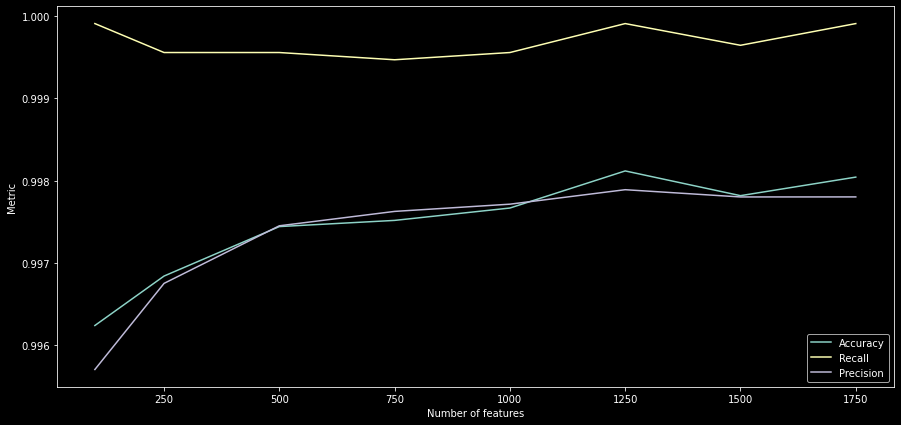

In [44]:
plt.figure(figsize=(15,7))
plt.plot(estimators, accs, label = "Accuracy")
plt.plot(estimators, recs, label = "Recall")
plt.plot(estimators, pres, label = "Precision")
plt.xlabel("Number of features" )
plt.ylabel("Metric")
plt.legend()
plt.show()

### Comaprison with decision tree

In [45]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(x_train, y_train)

dt_pred = decision_tree_model.predict(x_test)

dt_acc = accuracy_score(y_test,dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_pre = precision_score(y_test, dt_pred)

print("For decision tree: Accuracy: %f | Precision: %f | Recall: %f\n" % (acc, pre, rec))

For decision tree: Accuracy: 0.998043 | Precision: 0.997802 | Recall: 0.999912



In [46]:
model = GradientBoostingClassifier(learning_rate=0.15, n_estimators=1250)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
acc = accuracy_score(y_test, predictions)
accs.append(acc)
pre = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
print("For our GradientBoostingClassifier: Accuracy: %f | Precision: %f | Recall: %f\n" % (acc, pre, rec))

For our GradientBoostingClassifier: Accuracy: 0.997892 | Precision: 0.997889 | Recall: 0.999648

